In [3]:
using Distributions, PyPlot, LinearAlgebra, ForwardDiff

In [2]:
function set_options(ax, xlabel, ylabel, title; grid=true, gridy=false, legend=false)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    if grid
        if gridy
            ax.grid(axis="y")
        else
            ax.grid()
        end
    end
    legend && ax.legend()
end

set_options (generic function with 1 method)

In [4]:
eye(n) = Diagonal{Float64}(I, n)

unzip(a) = map(x->getfield.(a, x), fieldnames(eltype(a)))

unzip (generic function with 1 method)

## ラプラス近似

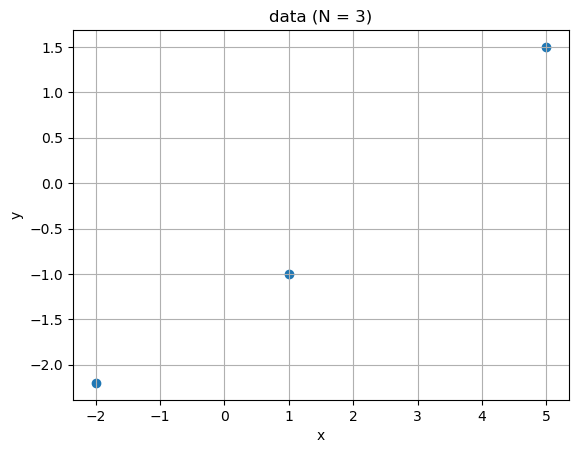

false

In [5]:
x_obs = [-2, 1, 5]

y_obs = [-2.2, -1.0, 1.5]

fig, ax = subplots()
ax.scatter(x_obs, y_obs)
set_options(ax, "x", "y", "data (N = $(length(x_obs)))")

### 線形回帰(単一パラメータ)

In [6]:
# fix
w₂ = 0

# std of y
σ = 1.0

# prior
μ₁ = 0.0
σ₁ = 10.0

10.0

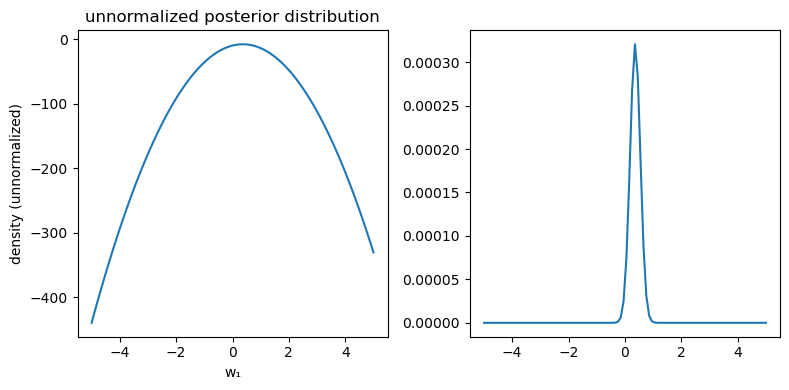

In [11]:
# ulpはgloval variableを直接参照するので計算速度は著しく低下する
ulp(w₁) = sum(logpdf.(Normal.(w₁*x_obs .+ w₂, σ), y_obs)) + logpdf(Normal(μ₁, σ₁), w₁)

w₁s = range(-5, 5, length=100)

fig, axes = subplots(1, 2, figsize=(8, 4))

axes[1].plot(w₁s, ulp.(w₁s))
set_options(axes[1], "w₁", "log density (unnormalized)", "unnormalized log posterior distribution")

axes[2].plot(w₁s, exp.(ulp.(w₁s)))
set_options(axes[1], "w₁", "density (unnormalized)", "unnormalized posterior distribution")

tight_layout()

Stap1:  
勾配法によって、事後分布の極大値を1つ求め、近似用の正規分布の平均とする。

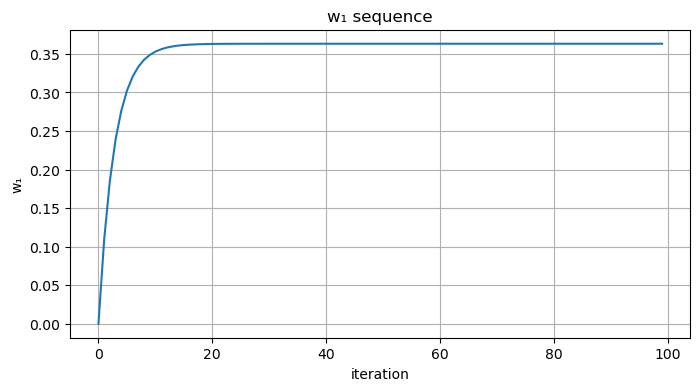

100-element Vector{Float64}:
 0.0
 0.109
 0.18528909999999998
 0.23868384109
 0.276054820378891
 0.3022107687831858
 0.3205173170713517
 0.33333007021823907
 0.3422977161457455
 0.34857417153040726
 0.352967062654132
 0.356041647151627
 0.35819354884142374
 ⋮
 0.3632122625791319
 0.3632122625791344
 0.3632122625791362
 0.3632122625791374
 0.3632122625791383
 0.3632122625791389
 0.3632122625791393
 0.36321226257913963
 0.36321226257913986
 0.36321226257913997
 0.3632122625791401
 0.36321226257914013

In [17]:
function gradient_method_1dim(f, x_init, η, maxiter)
    f′(x) = ForwardDiff.derivative(f, x)
    x_seq = Array{typeof(x_init), 1}(undef, maxiter)
    x_seq[1] = x_init
    for i in 2:maxiter
        x_seq[i] = x_seq[i-1] + η*f′(x_seq[i-1])
    end
    x_seq
end

w₁_init = 0.0
maxiter = 100
η = 0.01

w₁_seq = gradient_method_1dim(ulp, w₁_init, η, maxiter)

fig, ax = subplots(figsize=(8, 4))
ax.plot(w₁_seq)
set_options(ax, "iteration", "w₁", "w₁ sequence")
w₁_seq

In [24]:
w₁_init = 0.0
maxiter = 100
η = 0.01

function inference_wrapper_gd_1dim(log_joint, params, w₁_init, η, maxiter)
    ulp(w₁) = log_joint(w₁, params...)
    w₁_seq = gradient_method_1dim(ulp, w₁_init, η, maxiter)
    w₁_seq
end

log_joint(w₁, x, y, w₂, σ, μ₁, σ₁) = sum(logpdf.(Normal.(w₁*x .+ w₂, σ), y)) + logpdf(Normal(μ₁, σ₁), w₁)
params = (x_obs, y_obs, w₁_init, σ, μ₁, σ₁)

w₁_seq = inference_wrapper_gd_1dim(log_joint, params, w₁_init, η, maxiter)

100-element Vector{Float64}:
 0.0
 0.109
 0.18528909999999998
 0.23868384109
 0.276054820378891
 0.3022107687831858
 0.3205173170713517
 0.33333007021823907
 0.3422977161457455
 0.34857417153040726
 0.352967062654132
 0.356041647151627
 0.35819354884142374
 ⋮
 0.3632122625791319
 0.3632122625791344
 0.3632122625791362
 0.3632122625791374
 0.3632122625791383
 0.3632122625791389
 0.3632122625791393
 0.36321226257913963
 0.36321226257913986
 0.36321226257913997
 0.3632122625791401
 0.36321226257914013

In [25]:
w₁_init = 0.0
maxiter = 1_000_000
η = 0.01

@time gradient_method_1dim(ulp, w₁_init, η, maxiter)

@time inference_wrapper_gd_1dim(log_joint, params, w₁_init, η, maxiter)

  2.258273 seconds (21.00 M allocations: 770.560 MiB, 10.63% gc time)
  0.257410 seconds (9.00 M allocations: 358.574 MiB, 10.07% gc time)


1000000-element Vector{Float64}:
 0.0
 0.109
 0.18528909999999998
 0.23868384109
 0.276054820378891
 0.3022107687831858
 0.3205173170713517
 0.33333007021823907
 0.3422977161457455
 0.34857417153040726
 0.352967062654132
 0.356041647151627
 0.35819354884142374
 ⋮
 0.36321226257914024
 0.36321226257914024
 0.36321226257914024
 0.36321226257914024
 0.36321226257914024
 0.36321226257914024
 0.36321226257914024
 0.36321226257914024
 0.36321226257914024
 0.36321226257914024
 0.36321226257914024
 0.36321226257914024

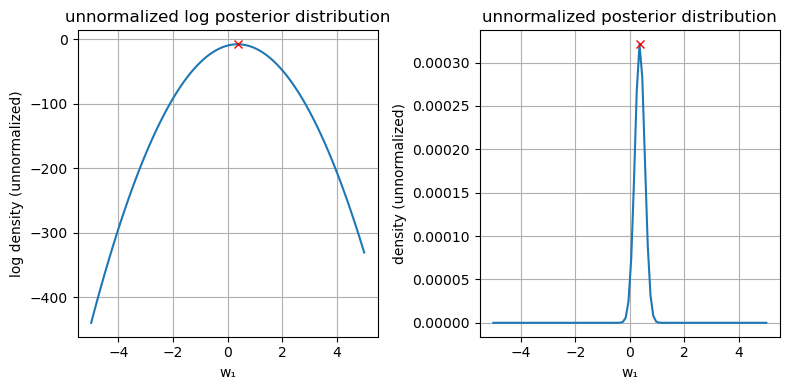

In [26]:
μ_approx = w₁_seq[end]

w₁s = range(-5, 5, length=100)

fig, axes = subplots(1, 2, figsize=(8, 4))

axes[1].plot(w₁s, ulp.(w₁s))
axes[1].plot(μ_approx, ulp(μ_approx), "rx", label="optimal")
set_options(axes[1], "w₁", "log density (unnormalized)", "unnormalized log posterior distribution")

axes[2].plot(w₁s, exp.(ulp.(w₁s)))
axes[2].plot(μ_approx, exp(ulp(μ_approx)), "rx", label="optimal")
set_options(axes[2], "w₁", "density (unnormalized)", "unnormalized posterior distribution")

tight_layout()

Step2:  
求めた極大値において、２階微分が一致するように近似用の正規分布の分散を求める。

In [28]:
grad(x) = ForwardDiff.derivative(ulp, x)
hessian(x) = ForwardDiff.derivative(grad, x)
σ_approx = sqrt(inv(-hessian(μ_approx)))

0.1825437644092281

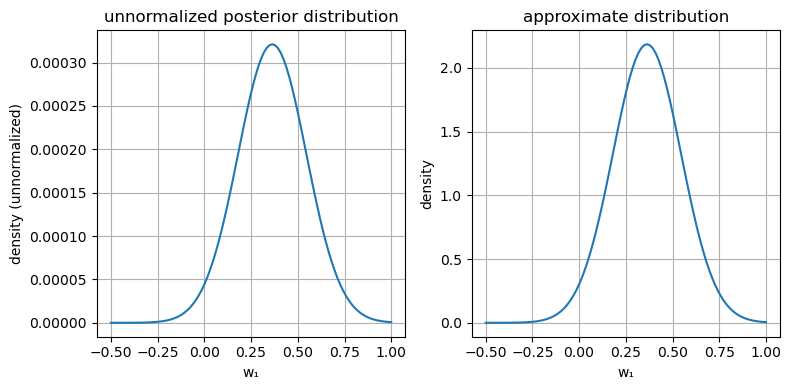

In [29]:
w₁s = range(-0.5, 1.0, length=100)

fig, axes = subplots(1, 2, figsize=(8, 4))

axes[1].plot(w₁s, exp.(ulp.(w₁s)))
set_options(axes[1], "w₁", "density (unnormalized)", "unnormalized posterior distribution")

axes[2].plot(w₁s, pdf.(Normal.(μ_approx, σ_approx), w₁s))
set_options(axes[2], "w₁", "density", "approximate distribution")

tight_layout()

### 線形回帰(複数パラメータ)

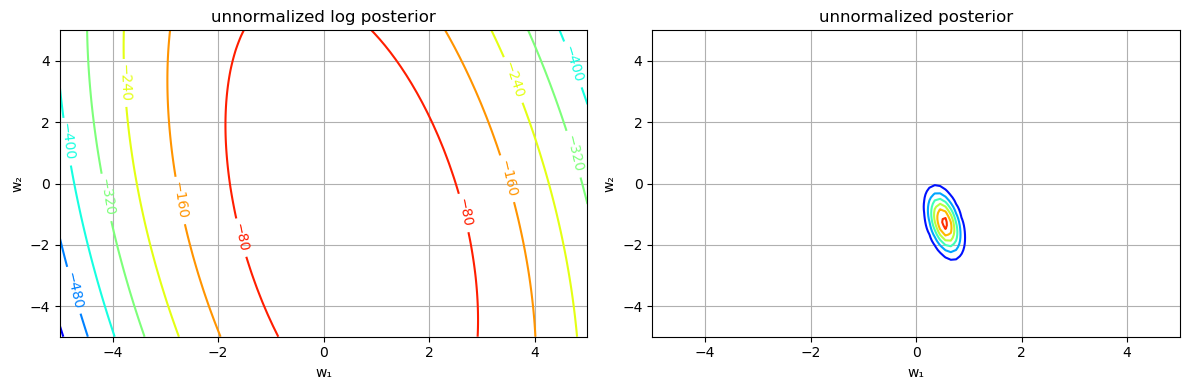

In [34]:
σ = 1.0
μ₁ = 0.0
μ₂ = 0.0
σ₁ = 10.0
σ₂ = 10.0

log_joint(w, x, y, σ, μ₁, σ₁, μ₂, σ₂) = 
    sum(logpdf.(Normal.(w[1]*x .+ w[2], σ), y)) + 
    logpdf(Normal(μ₁, σ₁), w[1]) + 
    logpdf(Normal(μ₂, σ₂), w[2])

params = (x_obs, y_obs, σ, μ₁, σ₁, μ₂, σ₂)
ulp(w) = log_joint(w, params...)

w₁s = range(-5, 5, length=100)
w₂s = range(-5, 5, length=100)

fig, axes = subplots(1, 2, figsize=(12, 4))

cs = axes[1].contour(w₁s, w₂s, [ulp([w₁, w₂]) for w₁ in w₁s, w₂ in w₂s]', cmap="jet")
axes[1].clabel(cs, inline=true)
set_options(axes[1], "w₁", "w₂", "unnormalized log posterior")

cs = axes[2].contour(w₁s, w₂s, [exp(ulp([w₁, w₂])) for w₁ in w₁s, w₂ in w₂s]', cmap="jet")
axes[2].clabel(cs, inline=true)
set_options(axes[2], "w₁", "w₂", "unnormalized posterior")

tight_layout()

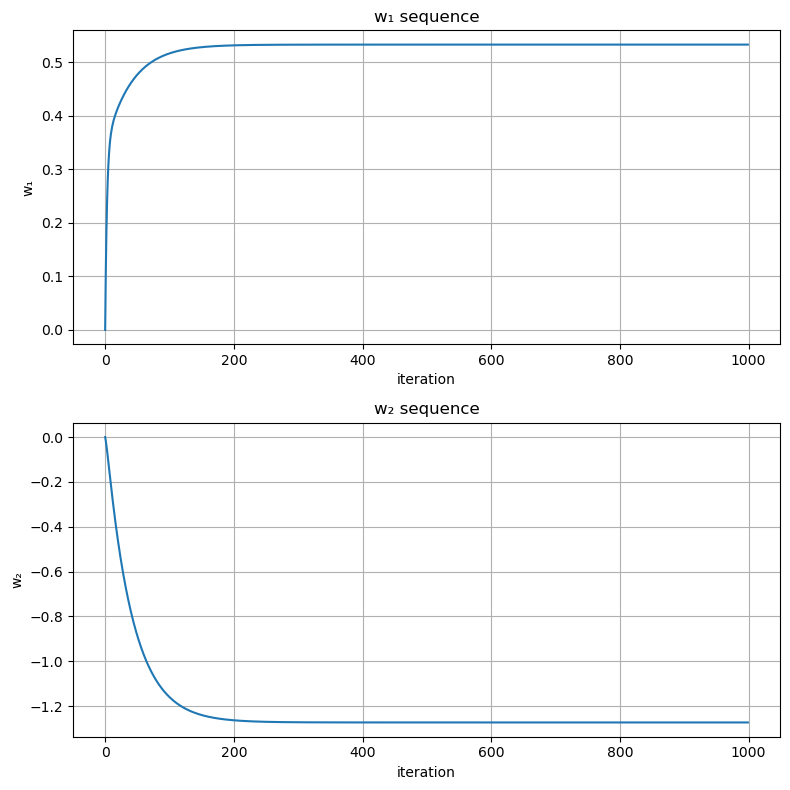

In [43]:
function gradient_method(f, x_init, η, maxiter)
    x_seq = Array{typeof(x_init[1]), 2}(undef, length(x_init), maxiter)
    g(x) = ForwardDiff.gradient(f, x)
    x_seq[:, 1] = x_init
    for i in 2:maxiter
        x_seq[:, i] = x_seq[:, i-1] + η*g(x_seq[:, i-1])
    end
    x_seq
end

function inference_wrapper_gd(log_joint, params, w_init, η, maxiter)
    ulp(w) = log_joint(w, params...)
    w_seq = gradient_method(ulp, w_init, η, maxiter)
    w_seq
end

w_init = [0.0, 0.0]
maxiter = 1000
η = 0.01

w_seq = inference_wrapper_gd(log_joint, params, w_init, η, maxiter)

fig, axes = subplots(2, 1, figsize=(8, 8))
axes[1].plot(w_seq[1, :])
set_options(axes[1], "iteration", "w₁", "w₁ sequence")
axes[2].plot(w_seq[2, :])
set_options(axes[2], "iteration", "w₂", "w₂ sequence")

tight_layout()

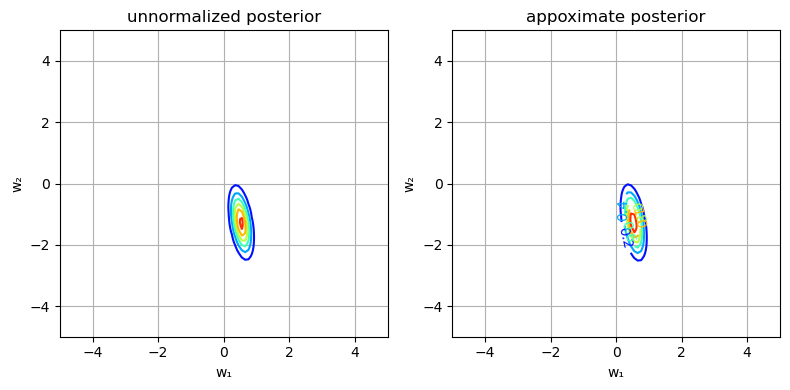

In [45]:
μ_approx = w_seq[:, end]

hessian(w) = ForwardDiff.hessian(ulp, w)
Σ_approx = inv(-hessian(μ_approx))

fig, axes = subplots(1, 2, figsize=(8, 4))

cs = axes[1].contour(w₁s, w₂s, [exp(ulp([w₁, w₂])) for w₁ in w₁s, w₂ in w₂s]', cmap="jet")
axes[1].clabel(cs, inline="true")
set_options(axes[1], "w₁", "w₂", "unnormalized posterior")

cs = axes[2].contour(w₁s, w₂s, [pdf(MvNormal(μ_approx, Σ_approx), [w₁, w₂]) for w₁ in w₁s, w₂ in w₂s]', cmap="jet")
axes[2].clabel(cs, inline="true")
set_options(axes[2], "w₁", "w₂", "appoximate posterior")

tight_layout()

In [46]:
Δ₁ = w₁s[2] - w₁s[1]
Δ₂ = w₂s[2] - w₂s[1]

p_predictive(x, y) = sum([pdf(Normal(w₁*x + w₂, σ), y) * pdf(MvNormal(μ_approx, Σ_approx), [w₁, w₂])*Δ₁*Δ₂ 
        for w₁ in w₁s, w₂ in w₂s])

p_predictive (generic function with 1 method)

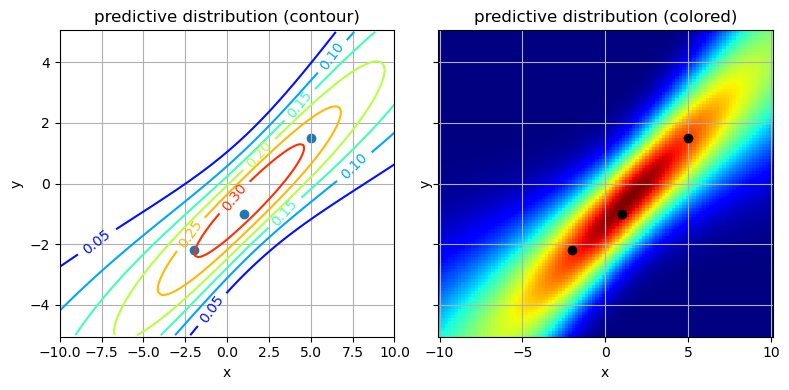

In [47]:
xs = range(-10, 10, length=100)
ys = range(-5, 5, length=100)

density_y = p_predictive.(xs, ys')

fig, axes = subplots(1, 2, sharey=true, figsize=(8, 4))

cs = axes[1].contour(xs, ys, density_y', cmap="jet")
axes[1].clabel(cs, inline=true)
axes[1].scatter(x_obs, y_obs)
set_options(axes[1], "x", "y", "predictive distribution (contour)")

xgrid = repeat(xs', length(ys), 1)
ygrid = repeat(ys, 1, length(xs))
axes[2].pcolormesh(xgrid, ygrid, density_y', cmap="jet", shading="auto")
axes[2].plot(x_obs, y_obs, "ko", label="data")
set_options(axes[2], "x", "y", "predictive distribution (colored)")

tight_layout()

### ロジスティック回帰

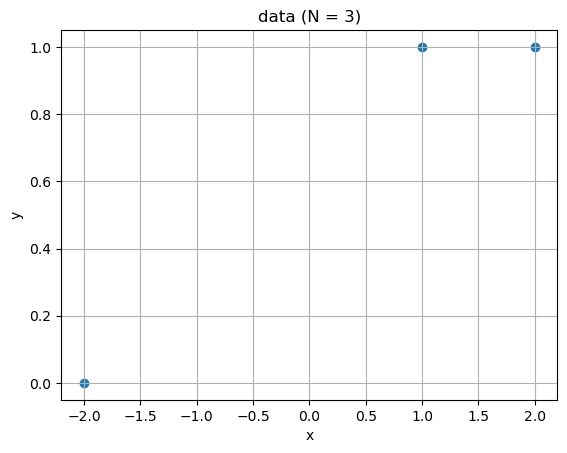

false

In [48]:
x_obs = [-2, 1, 2]

y_obs = Bool.([0, 1, 1])

fig, ax = subplots()
ax.scatter(x_obs, y_obs)
set_options(ax, "x", "y", "data (N = $(length(x_obs)))")

In [49]:
sig(x) = 1/(1 + exp(-x))

μ₁ = 0.0
μ₂ = 0.0
σ₁ = 10.0
σ₂ = 10.0

log_joint(w, x, y, μ₁, σ₁, μ₂, σ₂) = 
    sum(logpdf.(Bernoulli.(sig.(w[1]*x .+ w[2])), y)) + 
    logpdf(Normal(μ₁, σ₁), w[1]) + 
    logpdf(Normal(μ₂, σ₂), w[2])

params = (x_obs, y_obs, μ₁, σ₁, μ₂, σ₂)
ulp(w) = log_joint(w, params...)

ulp (generic function with 1 method)

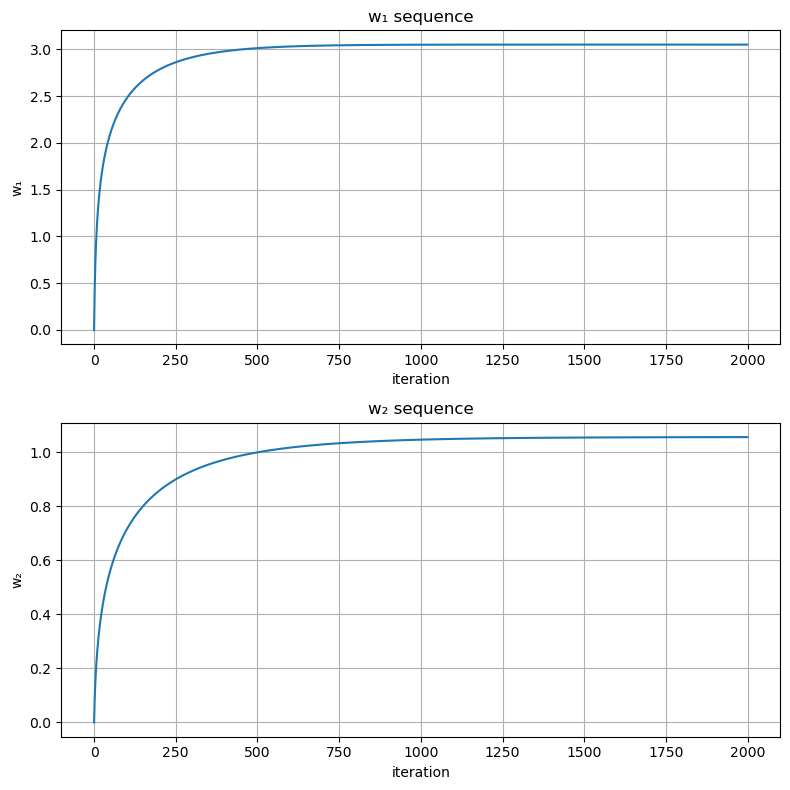

In [50]:
w_init = [0.0, 0.0]
maxiter = 2000
η = 0.1

w_seq = inference_wrapper_gd(log_joint, params, w_init, η, maxiter)

fig, axes = subplots(2, 1, figsize=(8, 8))
axes[1].plot(w_seq[1, :])
set_options(axes[1], "iteration", "w₁", "w₁ sequence")
axes[2].plot(w_seq[2, :])
set_options(axes[2], "iteration", "w₂", "w₂ sequence")

tight_layout()

In [51]:
μ_approx = w_seq[:, end]

hessian(w) = ForwardDiff.hessian(ulp, w)
Σ_approx = inv(-hessian(μ_approx))

2×2 Matrix{Float64}:
 18.6137   -2.69261
 -2.69261  30.6517

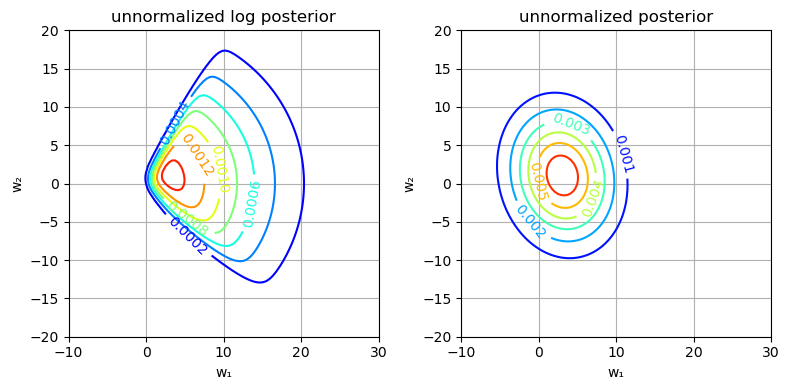

In [54]:
w₁s = range(-10, 30, length=100)
w₂s = range(-20, 20, length=100)

fig, axes = subplots(1, 2, figsize=(8, 4))

cs = axes[1].contour(w₁s, w₂s, [exp(ulp([w₁, w₂])) + eps() for w₁ in w₁s, w₂ in w₂s]', cmap="jet")
axes[1].clabel(cs, inline=true)
set_options(axes[1], "w₁", "w₂", "unnormalized log posterior")

cs = axes[2].contour(w₁s, w₂s, [pdf(MvNormal(μ_approx, Σ_approx), [w₁, w₂]) for w₁ in w₁s, w₂ in w₂s]', cmap="jet")
axes[2].clabel(cs, inline=true)
set_options(axes[2], "w₁", "w₂", "unnormalized posterior")

tight_layout()

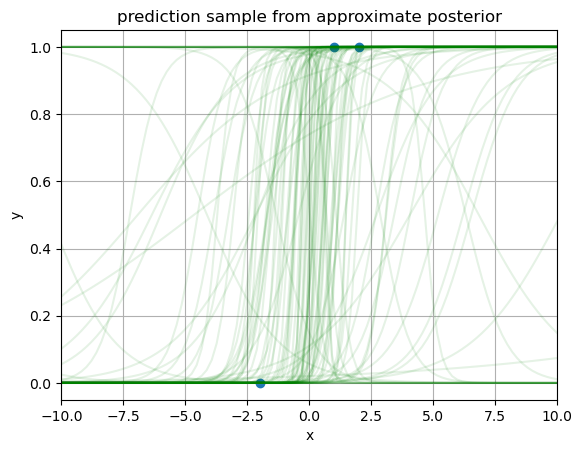

false

In [56]:
w = rand(MvNormal(μ_approx, Σ_approx), 100)

fig, ax = subplots()
for i in 1:size(w, 2)
    w₁, w₂ = w[:, i]
    f(x) = sig(w₁*x + w₂)
    ax.plot(xs, f.(xs), "g", alpha=0.1)
end
ax.scatter(x_obs, y_obs)
ax.set_xlim(extrema(xs))
set_options(ax, "x", "y", "prediction sample from approximate posterior")

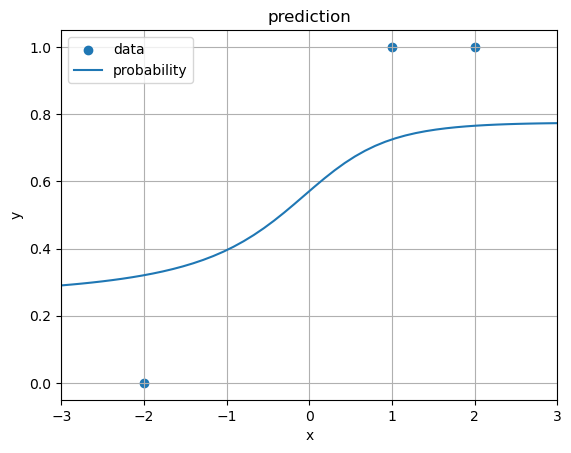

PyObject <matplotlib.legend.Legend object at 0x7fd8024b3d90>

In [57]:
Δ₁ = w₁s[2] - w₁s[1]
Δ₂ = w₂s[2] - w₂s[1]

p_predictive(x, y) = sum([pdf(Bernoulli(sig(w₁*x + w₂)), y) * pdf(MvNormal(μ_approx, Σ_approx), [w₁, w₂])*Δ₁*Δ₂ 
        for w₁ in w₁s, w₂ in w₂s])

xs = range(-3, 3, length=50)

fig, ax = subplots()
ax.scatter(x_obs, y_obs, label="data")
ax.plot(xs, p_predictive.(xs, 1), label="probability")
ax.set_xlim([-3, 3])
set_options(ax, "x", "y", "prediction", legend=true)

## ハミルトニアンモンテカルロ法

### MCMC

初期サンプル$\mu_0$を設定 　

初期サンプルの値を用いて2つ目のサンプル$\mu_1$を確率的に選定 　

これを規定回数続け停止

あるサンプル$\mu_i$から次のサンプル$\mu_{i+1}$を選び出す方法は「遷移カーネル」と呼ばれる 　

遷移カーネルでは$\mu_i$と「それほど遠くない」ような値が確率的に選択される

### メトロポリスヘイスティングス法

1. 次の比率$r$を計算する、$q$は提案分布と呼ばれる<br>
$$r = \dfrac{\tilde{p} (\mu_{tmp}) q(\mu_i|\mu_{tmp})}{\tilde{p}(\mu_i) q(\mu_{tmp}|\mu_i)}$$


2. 提案された点$\mu_{tmp}$を確率$min(1, r)$によって$\mu_{i+1} \leftarrow \mu_{tmp}$として受容し、<br>そうでない場合は$\mu_{tmp}$は棄却され、$\mu_{i+1} \leftarrow \mu_{i}$とする

In [64]:
function GaussianMH(log_p_tilde, μ₀; maxiter::Int=100_000, σ::Float64=1.0)
    D = length(μ₀)
    μ_samples = Array{typeof(μ₀[1]), 2}(undef, D, maxiter)
    
    μ_samples[:, 1] = μ₀
    
    num_accepted = 1
    
    for i in 2:maxiter
        μ_tmp = rand(MvNormal(μ_samples[:, i-1], σ*eye(D))) # q = N(μₜₘₚ|μᵢ, σI)
        
        log_r = (log_p_tilde(μ_tmp) + 
                        logpdf(MvNormal(μ_tmp, σ), μ_samples[:, i-1])) -
                        (log_p_tilde(μ_samples[:, i-1]) + 
                        logpdf(MvNormal(μ_samples[:, i-1], σ), μ_tmp))
        
        is_accepted = min(1, exp(log_r)) > rand()
        new_sample = is_accepted ? μ_tmp : μ_samples[:, i-1]
        
        μ_samples[:, i] = new_sample
        
        num_accepted += is_accepted
    end
    
    μ_samples, num_accepted
end

GaussianMH (generic function with 1 method)

### ハミルトニアンモンテカルロ法の手続き

リープフロッグ法

1. 運動量を多変量正規分布からサンプリング$p^{(0)}$〜$\mathcal{N}(p^{(0)}|0, I)$する

2. $\mu^{(0)}=\mu_{i-1}$として、運動量を次のように更新する
$$p^{(1)} = p^{(0)} + \frac{1}{2}\epsilon \nabla \log \tilde{p}(\mu^{(0)})$$

3. 下記の更新式を$j = 1, 2, 3, ..., L-1$に関して計算する
$$\mu^{(j)} = \mu^{(j-1)} + \epsilon p^{(j)}$$
$$p^{(j+1)} = p^{(j)} + \epsilon \nabla \log \tilde{p}(\mu^{(j)})$$

4. 下記$\mu_{tmp}$, $p_{tmp}$を最終的な候補とする
$$\mu_{tmp} = \mu^{(L-1)} + \epsilon p^{(L)}$$
$$p_{tmp} = p^{(L)} + \epsilon \nabla \log \tilde{p}(\mu_{tmp})$$

In [59]:
function HMC(log_p_tilde, μ₀; maxiter::Int=100_000, L::Int=100, ϵ::Float64=1e-1)
    function leapflog(grad, p_in, μ_in, L, ϵ)
        μ = μ_in
        p = p_in + 0.5*ϵ*grad(μ)
        for l in 1:L-1
            μ += ϵ*p
            p += ϵ*grad(μ)
        end
        μ += ϵ*p
        p += 0.5*ϵ*grad(μ)
        p, μ
    end
    
    grad(μ) = ForwardDiff.gradient(log_p_tilde, μ)
    
    D = length(μ₀)
    μ_samples = Array{typeof(μ₀[1]), 2}(undef, D, maxiter)
    
    μ_samples[:, 1] = μ₀
    
    num_accepted = 1
    
    for i in 2:maxiter
        p_in = randn(size(μ₀))
        
        p_out, μ_out = leapflog(grad, p_in, μ_samples[:, i-1], L, ϵ)
        
        μ_in = μ_samples[:, i-1]
        log_r = (log_p_tilde(μ_out) +
                        logpdf(MvNormal(zeros(D), eye(D)), vec(p_out))) - 
                        (log_p_tilde(μ_in) + 
                        logpdf(MvNormal(zeros(D), eye(D)), vec(p_in)))
        
        is_accepted = min(1, exp(log_r)) > rand()
        new_sample = is_accepted ? μ_out : μ_in
        
        μ_samples[:, i] = new_sample
        
        num_accepted += is_accepted
    end
    
    μ_samples, num_accepted
end

HMC (generic function with 1 method)

In [69]:
function inference_wrapper_GMH(log_joint, params, w_init; maxiter::Int=100000, σ::Float64=1.0)
    ulp(w) = log_joint(w, params...)
    GaussianMH(ulp, w_init; maxiter=maxiter, σ=σ)
end

function inference_wrapper_HMC(log_joint, params, w_init; maxiter::Int=100000, L::Int=100, ϵ::Float64=1e-1)
    ulp(w) = log_joint(w, params...)
    HMC(ulp, w_init; maxiter=maxiter, L=L, ϵ=ϵ)
end

inference_wrapper_HMC (generic function with 1 method)

### 線形回帰

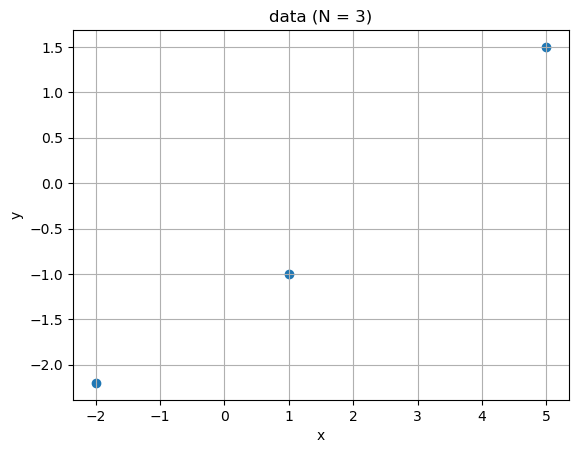

false

In [61]:
x_obs = [-2, 1, 5]

y_obs = [-2.2, -1.0, 1.5]

fig, ax = subplots()
ax.scatter(x_obs, y_obs)
set_options(ax, "x", "y", "data (N = $(length(x_obs)))")

In [62]:
log_joint(w, x, y, σ, μ₁, σ₁, μ₂, σ₂) = 
    sum(logpdf.(Normal.(w[1]*x .+ w[2], σ), y)) + 
    logpdf(Normal(μ₁, σ₁), w[1]) + 
    logpdf(Normal(μ₂, σ₂), w[2])

params = (x_obs, y_obs, σ, μ₁, σ₁, μ₂, σ₂)
ulp(w) = log_joint(w, params...)

ulp (generic function with 1 method)

トレースプロット

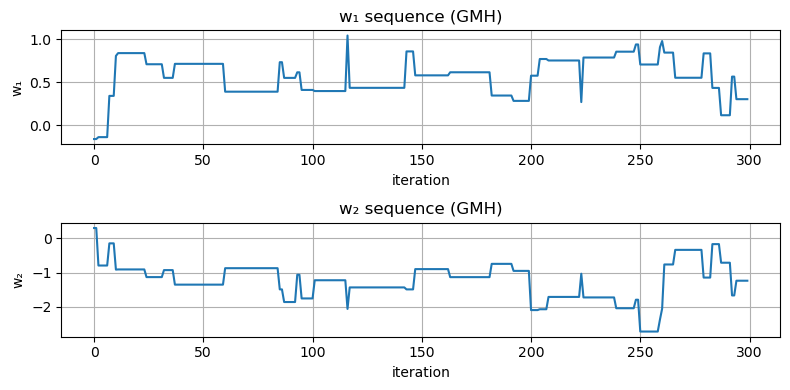

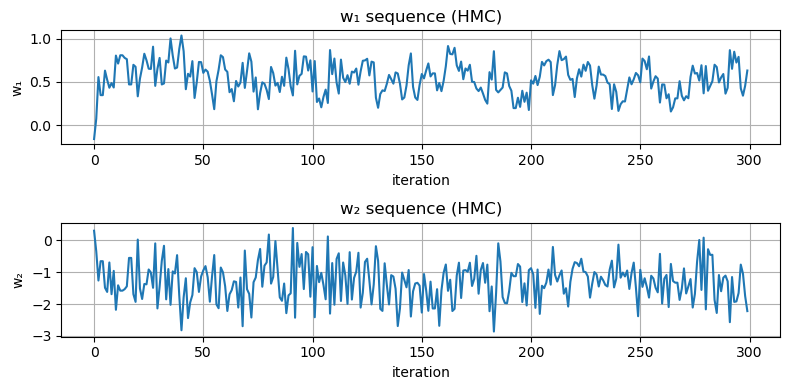

acceptance rate (GMH) = 0.12666666666666668
acceptance rate (HMC) = 0.98


In [71]:
w_init = randn(2)

maxiter = 300
param_posterior_GMH, num_accepted_GMH = inference_wrapper_GMH(log_joint, params, w_init, maxiter=maxiter, σ=1.0)
param_posterior_HMC, num_accepted_HMC = inference_wrapper_HMC(log_joint, params, w_init, maxiter=maxiter, L=10, ϵ=1e-1)

# GMH
fig, axes = subplots(2, 1, figsize=(8, 4))
axes[1].plot(param_posterior_GMH[1, :])
set_options(axes[1], "iteration", "w₁", "w₁ sequence (GMH)")
axes[2].plot(param_posterior_GMH[2, :])
set_options(axes[2], "iteration", "w₂", "w₂ sequence (GMH)")
tight_layout()
println("acceptance rate (GMH) = $(num_accepted_GMH / maxiter)")

# HMC
fig, axes = subplots(2, 1, figsize=(8, 4))
axes[1].plot(param_posterior_HMC[1, :])
set_options(axes[1], "iteration", "w₁", "w₁ sequence (HMC)")
axes[2].plot(param_posterior_HMC[2, :])
set_options(axes[2], "iteration", "w₂", "w₂ sequence (HMC)")
tight_layout()
println("acceptance rate (HMC) = $(num_accepted_HMC / maxiter)")

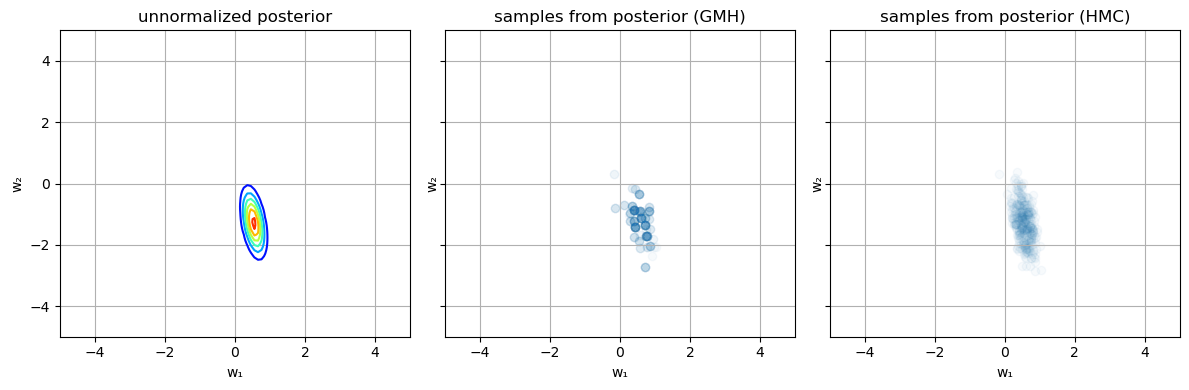

In [73]:
w₁s = range(-5, 5, length=100)
w₂s = range(-5, 5, length=100)

fig, axes = subplots(1, 3, sharex=true, sharey=true, figsize=(12, 4))

cs = axes[1].contour(w₁s, w₂s, [exp(ulp([w₁, w₂])) + eps() for w₁ in w₁s, w₂ in w₂s]', cmap="jet")
axes[1].clabel(cs, inline=true)
set_options(axes[1], "w₁", "w₂", "unnormalized posterior")

axes[2].scatter(param_posterior_GMH[1, :], param_posterior_GMH[2, :], alpha=10/maxiter)
set_options(axes[2], "w₁", "w₂", "samples from posterior (GMH)")

axes[3].scatter(param_posterior_HMC[1, :], param_posterior_HMC[2, :], alpha=10/maxiter)
set_options(axes[3], "w₁", "w₂", "samples from posterior (HMC)")

tight_layout()

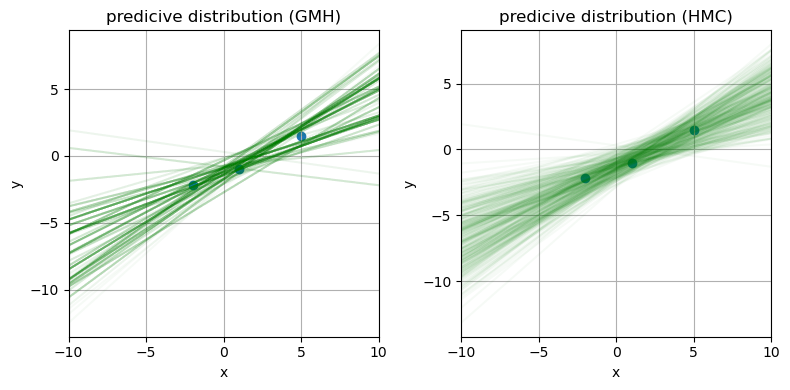

In [75]:
xs = range(-10, 10, length=100)

fig, axes = subplots(1, 2, figsize=(8, 4))

# GMH
for i in 1:size(param_posterior_GMH, 2)
    w₁, w₂ = param_posterior_GMH[:, i]
    f(x) = w₁*x + w₂
    axes[1].plot(xs, f.(xs), "g", alpha=10/maxiter)
end
axes[1].scatter(x_obs, y_obs)
axes[1].set_xlim(extrema(xs))
set_options(axes[1], "x", "y", "predicive distribution (GMH)")

# HMC
for i in 1:size(param_posterior_HMC, 2)
    w₁, w₂ = param_posterior_HMC[:, i]
    f(x) = w₁*x + w₂
    axes[2].plot(xs, f.(xs), "g", alpha=10/maxiter)
end
axes[2].scatter(x_obs, y_obs)
axes[2].set_xlim(extrema(xs))
set_options(axes[2], "x", "y", "predicive distribution (HMC)")

tight_layout()

### ロジスティック回帰

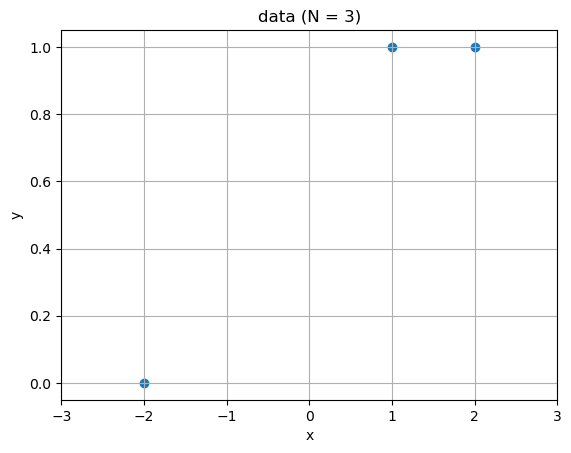

false

In [76]:
x_obs = [-2, 1, 2]

y_obs = Bool.([0, 1, 1])

fig, ax = subplots()
ax.scatter(x_obs, y_obs)
ax.set_xlim([-3, 3])
set_options(ax, "x", "y", "data (N = $(length(x_obs)))")

In [77]:
sig(x) = 1/(1 + exp(-x))

μ₁ = 0.0
μ₂ = 0.0
σ₁ = 10.0
σ₂ = 10.0

log_joint(w, x, y, μ₁, σ₁, μ₂, σ₂) = 
    sum(logpdf.(Bernoulli.(sig.(w[1]*x .+ w[2])), y)) + 
    logpdf(Normal(μ₁, σ₁), w[1]) + 
    logpdf(Normal(μ₂, σ₂), w[2])

params = (x_obs, y_obs, μ₁, σ₁, μ₂, σ₂)
ulp(w) = log_joint(w, params...)

ulp (generic function with 1 method)

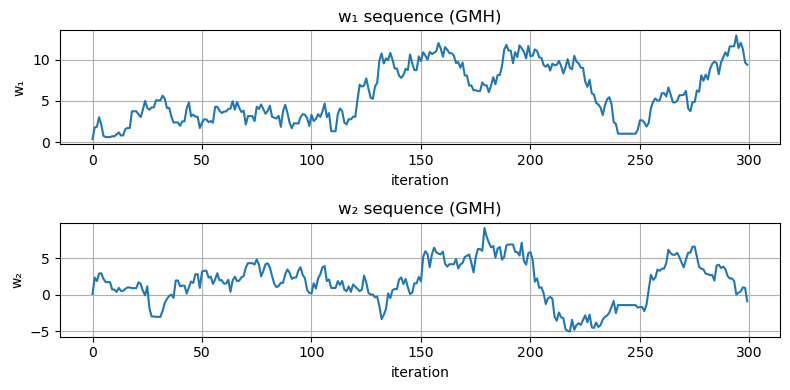

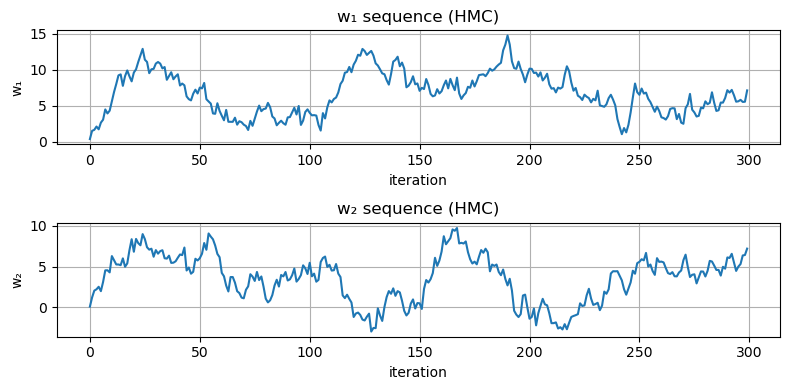

acceptance rate (GMH) = 0.8733333333333333
acceptance rate (HMC) = 0.9966666666666667


In [78]:
w_init = randn(2)

maxiter = 300
param_posterior_GMH, num_accepted_GMH = inference_wrapper_GMH(log_joint, params, w_init, maxiter=maxiter, σ=1.0)
param_posterior_HMC, num_accepted_HMC = inference_wrapper_HMC(log_joint, params, w_init, maxiter=maxiter, L=10, ϵ=1e-1)

# GMH
fig, axes = subplots(2, 1, figsize=(8, 4))
axes[1].plot(param_posterior_GMH[1, :])
set_options(axes[1], "iteration", "w₁", "w₁ sequence (GMH)")
axes[2].plot(param_posterior_GMH[2, :])
set_options(axes[2], "iteration", "w₂", "w₂ sequence (GMH)")
tight_layout()
println("acceptance rate (GMH) = $(num_accepted_GMH / maxiter)")

# HMC
fig, axes = subplots(2, 1, figsize=(8, 4))
axes[1].plot(param_posterior_HMC[1, :])
set_options(axes[1], "iteration", "w₁", "w₁ sequence (HMC)")
axes[2].plot(param_posterior_HMC[2, :])
set_options(axes[2], "iteration", "w₂", "w₂ sequence (HMC)")
tight_layout()
println("acceptance rate (HMC) = $(num_accepted_HMC / maxiter)")

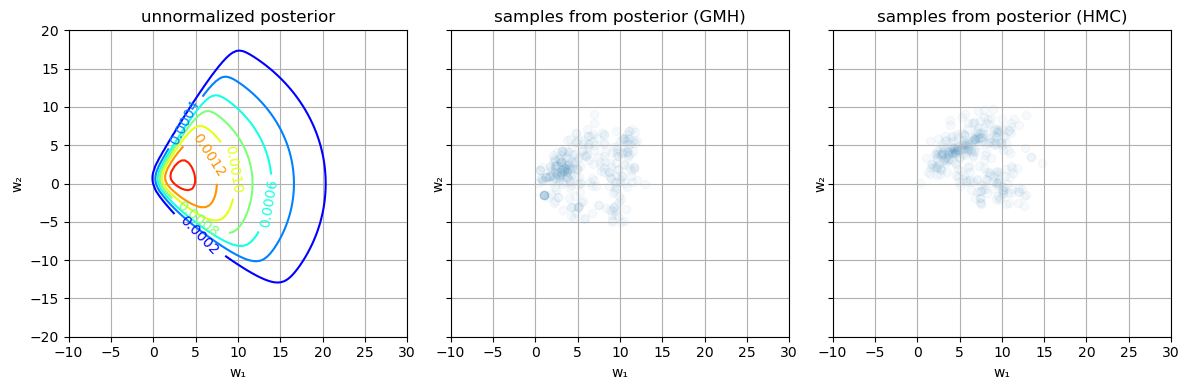

In [80]:
w₁s = range(-10, 30, length=100)
w₂s = range(-20, 20, length=100)

fig, axes = subplots(1, 3, sharex=true, sharey=true, figsize=(12, 4))

cs = axes[1].contour(w₁s, w₂s, [exp(ulp([w₁, w₂])) + eps() for w₁ in w₁s, w₂ in w₂s]', cmap="jet")
axes[1].clabel(cs, inline=true)
set_options(axes[1], "w₁", "w₂", "unnormalized posterior")

axes[2].scatter(param_posterior_GMH[1, :], param_posterior_GMH[2, :], alpha=10/maxiter)
set_options(axes[2], "w₁", "w₂", "samples from posterior (GMH)")

axes[3].scatter(param_posterior_HMC[1, :], param_posterior_HMC[2, :], alpha=10/maxiter)
set_options(axes[3], "w₁", "w₂", "samples from posterior (HMC)")

tight_layout()

受容率は高いが、幅広く探索できていない気がする  
→GMH：$\sigma$を大きくする、HMC：$\epsilon$を大きくする

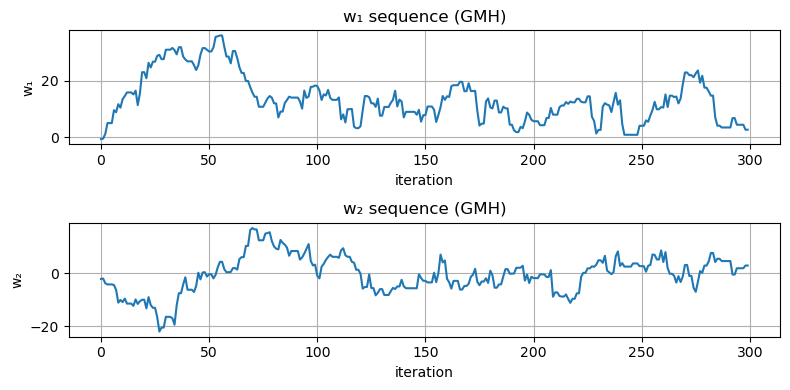

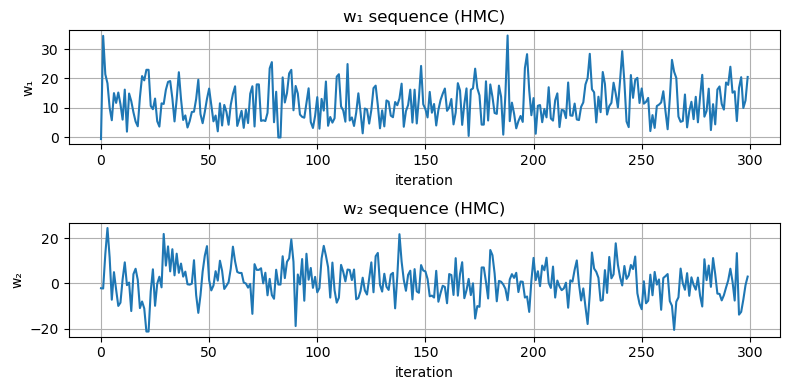

acceptance rate (GMH) = 0.7166666666666667
acceptance rate (HMC) = 0.9866666666666667


In [81]:
w_init = randn(2)

maxiter = 300
param_posterior_GMH, num_accepted_GMH = inference_wrapper_GMH(log_joint, params, w_init, maxiter=maxiter, σ=10.0)
param_posterior_HMC, num_accepted_HMC = inference_wrapper_HMC(log_joint, params, w_init, maxiter=maxiter, L=10, ϵ=1e-0)

# GMH
fig, axes = subplots(2, 1, figsize=(8, 4))
axes[1].plot(param_posterior_GMH[1, :])
set_options(axes[1], "iteration", "w₁", "w₁ sequence (GMH)")
axes[2].plot(param_posterior_GMH[2, :])
set_options(axes[2], "iteration", "w₂", "w₂ sequence (GMH)")
tight_layout()
println("acceptance rate (GMH) = $(num_accepted_GMH / maxiter)")

# HMC
fig, axes = subplots(2, 1, figsize=(8, 4))
axes[1].plot(param_posterior_HMC[1, :])
set_options(axes[1], "iteration", "w₁", "w₁ sequence (HMC)")
axes[2].plot(param_posterior_HMC[2, :])
set_options(axes[2], "iteration", "w₂", "w₂ sequence (HMC)")
tight_layout()
println("acceptance rate (HMC) = $(num_accepted_HMC / maxiter)")

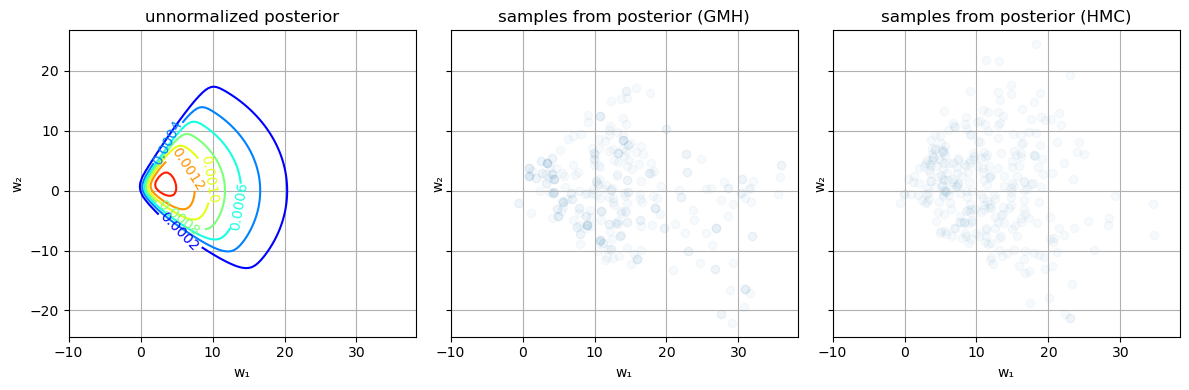

In [82]:
w₁s = range(-10, 30, length=100)
w₂s = range(-20, 20, length=100)

fig, axes = subplots(1, 3, sharex=true, sharey=true, figsize=(12, 4))

cs = axes[1].contour(w₁s, w₂s, [exp(ulp([w₁, w₂])) + eps() for w₁ in w₁s, w₂ in w₂s]', cmap="jet")
axes[1].clabel(cs, inline=true)
set_options(axes[1], "w₁", "w₂", "unnormalized posterior")

axes[2].scatter(param_posterior_GMH[1, :], param_posterior_GMH[2, :], alpha=10/maxiter)
set_options(axes[2], "w₁", "w₂", "samples from posterior (GMH)")

axes[3].scatter(param_posterior_HMC[1, :], param_posterior_HMC[2, :], alpha=10/maxiter)
set_options(axes[3], "w₁", "w₂", "samples from posterior (HMC)")

tight_layout()

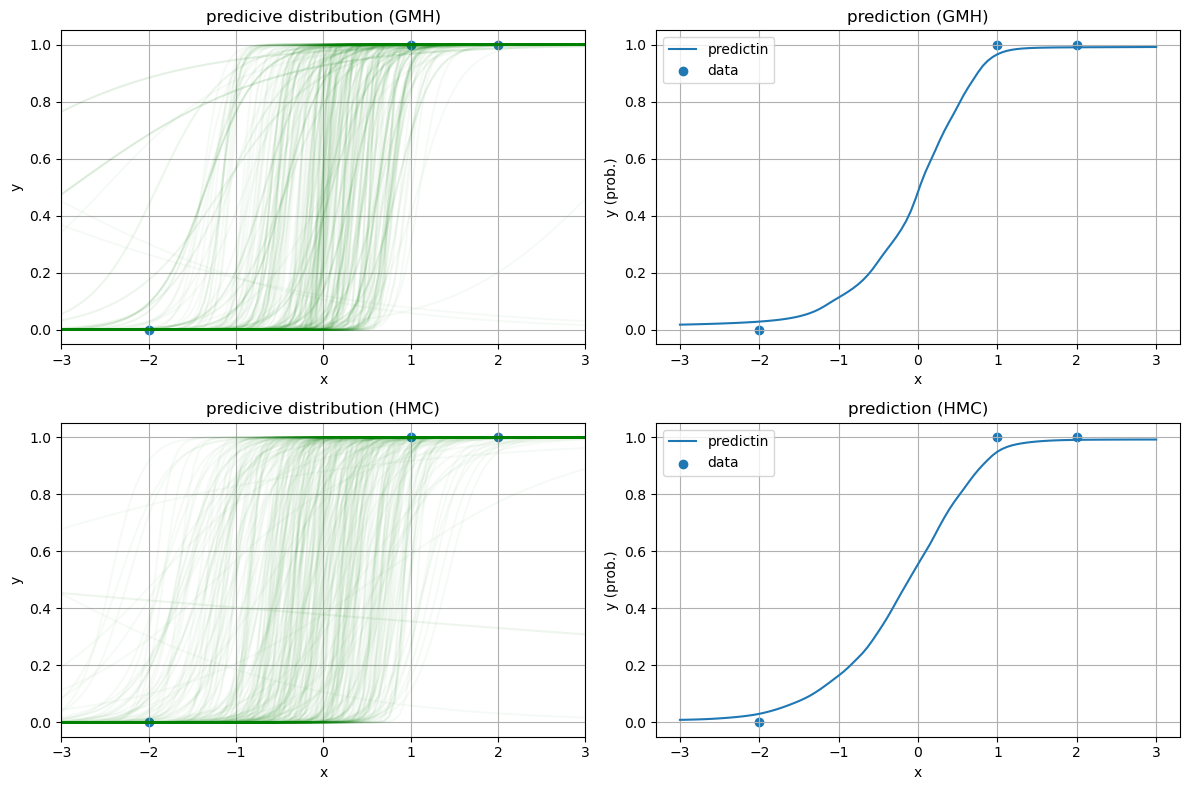

In [83]:
xs = range(-3, 3, length=100)

fig, axes = subplots(2, 2, figsize=(12, 8))

# GMH
fs = []
for i in 1:size(param_posterior_GMH, 2)
    w₁, w₂ = param_posterior_GMH[:, i]
    f(x) = sig(w₁*x + w₂)
    push!(fs, f.(xs))
    axes[1, 1].plot(xs, f.(xs), "g", alpha=10/maxiter)
end
axes[1, 1].scatter(x_obs, y_obs)
axes[1, 1].set_xlim(extrema(xs))
set_options(axes[1, 1], "x", "y", "predicive distribution (GMH)")

axes[1, 2].plot(xs, mean(fs), label="predictin")
axes[1, 2].scatter(x_obs, y_obs, label="data")
set_options(axes[1, 2], "x", "y (prob.)", "prediction (GMH)", legend=true)

# HMC
fs = []
for i in 1:size(param_posterior_HMC, 2)
    w₁, w₂ = param_posterior_HMC[:, i]
    f(x) = sig(w₁*x + w₂)
    push!(fs, f.(xs))
    axes[2, 1].plot(xs, f.(xs), "g", alpha=10/maxiter)
end
axes[2, 1].scatter(x_obs, y_obs)
axes[2, 1].set_xlim(extrema(xs))
set_options(axes[2, 1], "x", "y", "predicive distribution (HMC)")

axes[2, 2].plot(xs, mean(fs), label="predictin")
axes[2, 2].scatter(x_obs, y_obs, label="data")
set_options(axes[2, 2], "x", "y (prob.)", "prediction (HMC)", legend=true)

tight_layout()